In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = pd.read_csv("churn_clean.csv")
columns = ["Age", "Income","MonthlyCharge", "Tenure", "Outage_sec_perweek", "Email","Bandwidth_GB_Year", "Yearly_equip_failure","Gender","Contract",
           "Marital", "Area", "InternetService","PaperlessBilling", "Churn"]

In [78]:
numerical_var = columns[:8]
categorical_var = columns[8:]

In [79]:
updated_data = data[columns]

In [80]:
updated_data.describe()

,Age,Income,MonthlyCharge,Tenure,Outage_sec_perweek,Email,Bandwidth_GB_Year,Yearly_equip_failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,39806.926771,172.624816,34.526188,10.001848,12.016000,3392.341550,0.398000
std,20.698882,28199.916702,42.943094,26.443063,2.976019,3.025898,2185.294852,0.635953
min,18.000000,348.670000,79.978860,1.000259,0.099747,1.000000,155.506715,0.000000
25%,35.000000,19224.717500,139.979239,7.917694,8.018214,10.000000,1236.470827,0.000000
50%,53.000000,33170.605000,167.484700,35.430507,10.018560,12.000000,3279.536903,0.000000
75%,71.000000,53246.170000,200.734725,61.479795,11.969485,14.000000,5586.141370,1.000000
max,89.000000,258900.700000,290.160419,71.999280,21.207230,23.000000,7158.981530,6.000000


In [81]:
updated_data[categorical_var].describe()

,Gender,Contract,Marital,Area,InternetService,PaperlessBilling,Churn
count,10000,10000,10000,10000,7871,10000,10000
unique,3,3,5,3,2,2,2
top,Female,Month-to-month,Divorced,Suburban,Fiber Optic,Yes,No
freq,5025,5456,2092,3346,4408,5882,7350


### More into Categorical Variable

In [82]:
gender = updated_data.groupby(categorical_var[0]).Churn.size().reset_index()
gender

,Gender,Churn
0,Female,5025
1,Male,4744
2,Nonbinary,231


In [83]:
contract = updated_data.groupby(categorical_var[1]).Churn.size().reset_index()
contract

,Contract,Churn
0,Month-to-month,5456
1,One year,2102
2,Two Year,2442


In [84]:
marital = updated_data.groupby(categorical_var[2]).Churn.size().reset_index()
marital

,Marital,Churn
0,Divorced,2092
1,Married,1911
2,Never Married,1956
3,Separated,2014
4,Widowed,2027


In [85]:
area = updated_data.groupby(categorical_var[3]).Churn.size().reset_index()
area

,Area,Churn
0,Rural,3327
1,Suburban,3346
2,Urban,3327


In [86]:
internet = updated_data.groupby(categorical_var[4]).Churn.size().reset_index()
internet

,InternetService,Churn
0,DSL,3463
1,Fiber Optic,4408


In [87]:
billing = updated_data.groupby(categorical_var[5]).Churn.size().reset_index()
billing

,PaperlessBilling,Churn
0,No,4118
1,Yes,5882


In [88]:
churn = updated_data.groupby(categorical_var[6]).Area.size().reset_index()
churn

,Churn,Area
0,No,7350
1,Yes,2650


<Axes: >

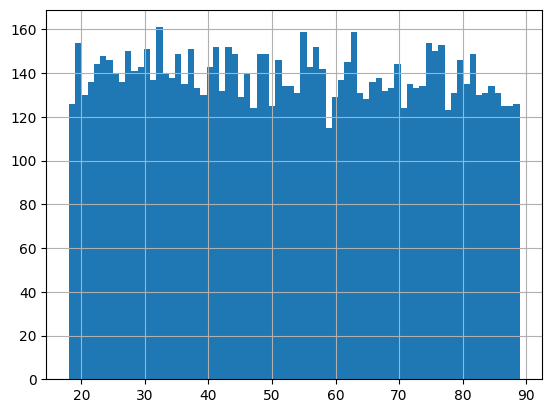

In [89]:
updated_data.Age.hist(bins = 72)

<Axes: >

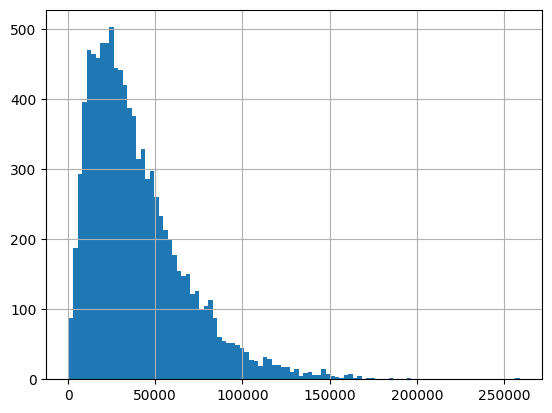

In [90]:
updated_data.Income.hist(bins=100)

<Axes: >

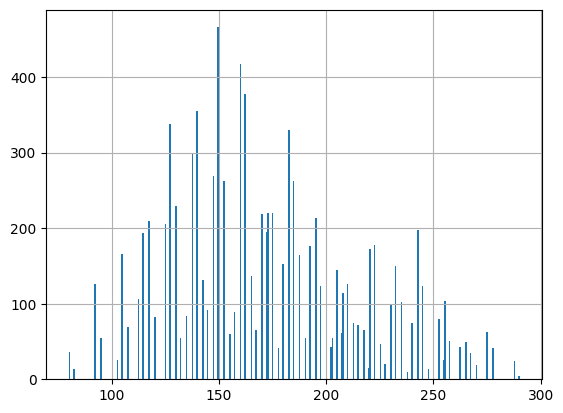

In [91]:
updated_data.MonthlyCharge.hist(bins=300)

<Axes: >

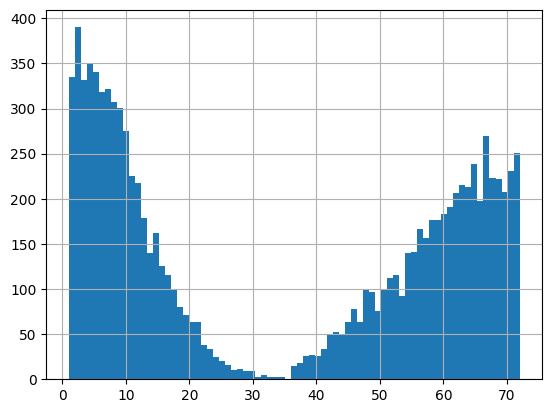

In [92]:
updated_data.Tenure.hist(bins=75)

<Axes: >

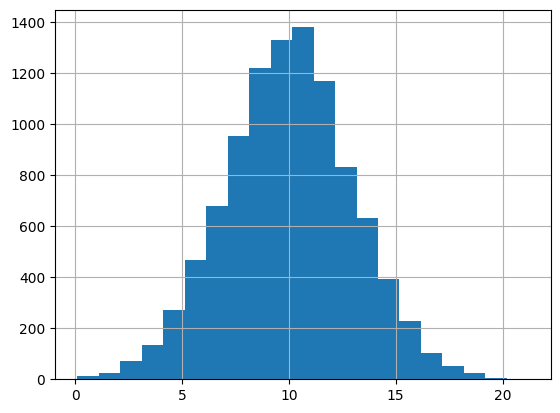

In [93]:
updated_data.Outage_sec_perweek.hist(bins=21)

<Axes: >

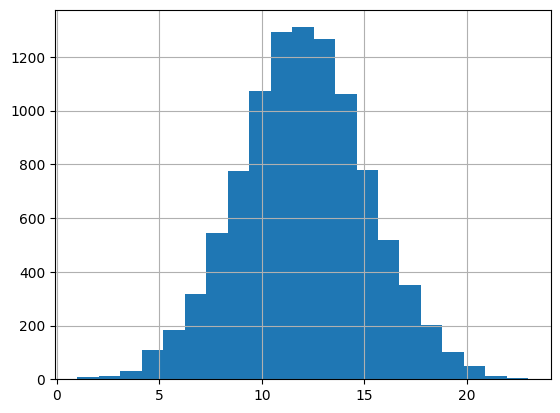

In [94]:
updated_data.Email.hist(bins=21)

<Axes: >

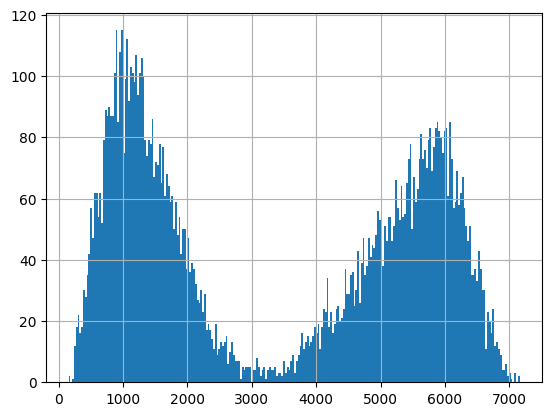

In [95]:
updated_data.Bandwidth_GB_Year.hist(bins=250)

<Axes: >

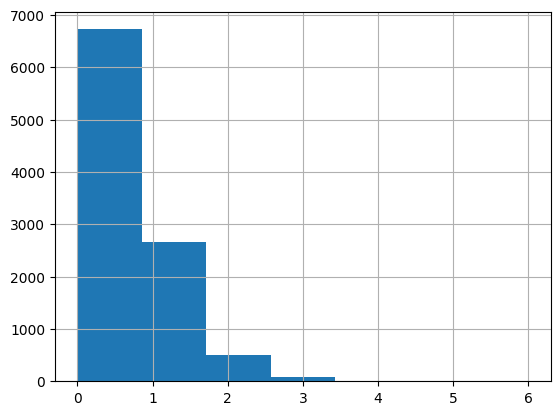

In [96]:
updated_data.Yearly_equip_failure.hist(bins=7)

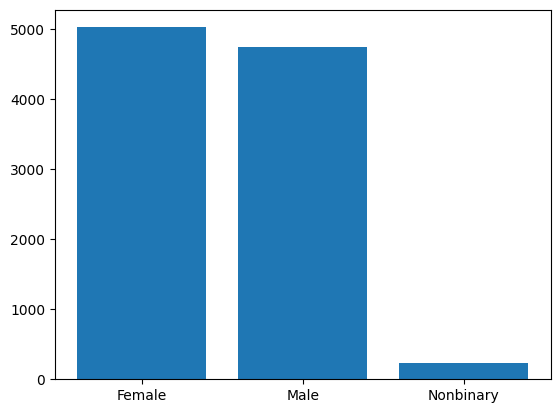

In [97]:
plt.bar(gender["Gender"], gender["Churn"])
plt.show()

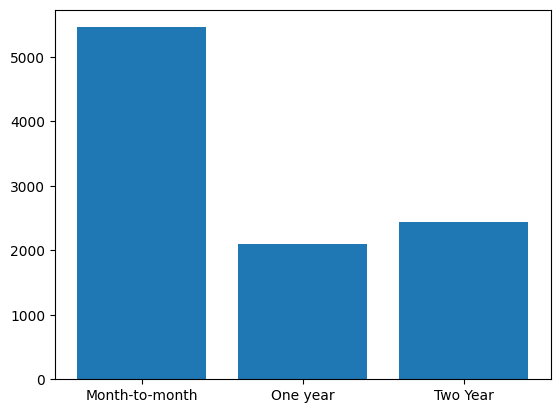

In [98]:
plt.bar(contract["Contract"], contract["Churn"])
plt.show()

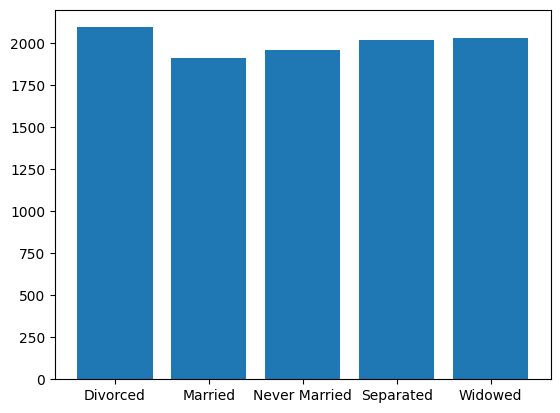

In [99]:
plt.bar(marital["Marital"], marital["Churn"])
plt.show()

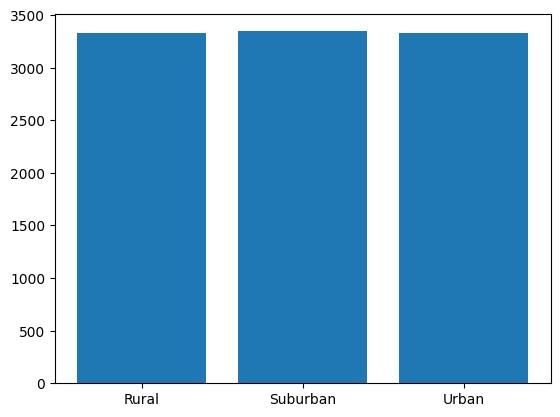

In [100]:
plt.bar(area["Area"], area["Churn"])
plt.show()

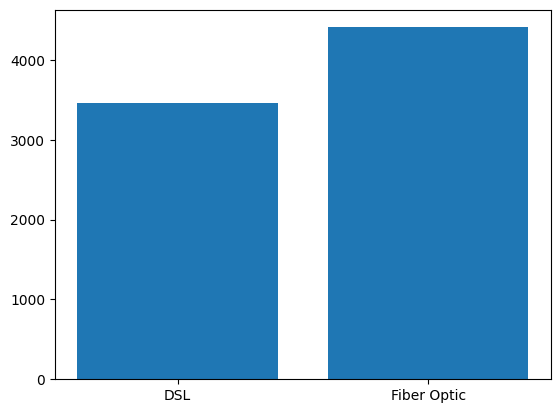

In [101]:
plt.bar(internet["InternetService"], internet["Churn"])
plt.show()

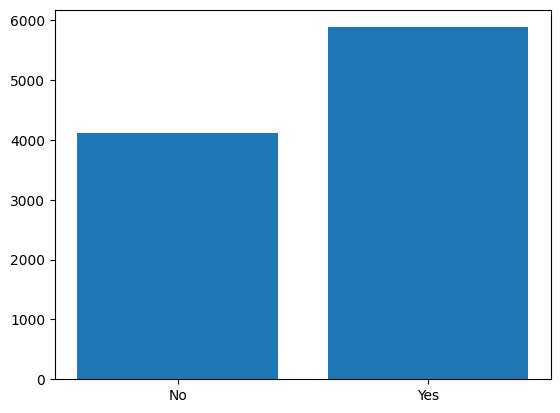

In [102]:
plt.bar(billing["PaperlessBilling"], billing["Churn"])
plt.show()

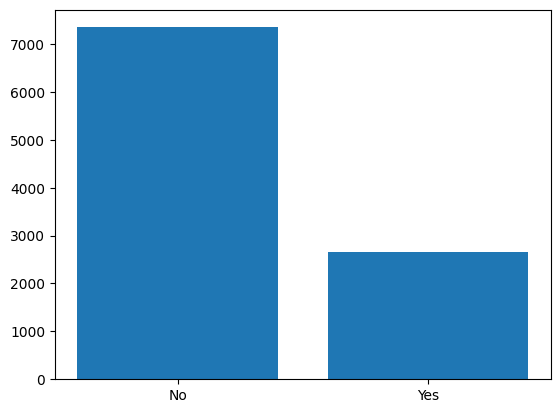

In [103]:
plt.bar(churn["Churn"], churn["Area"])
plt.show()

<Axes: xlabel='Churn', ylabel='Age'>

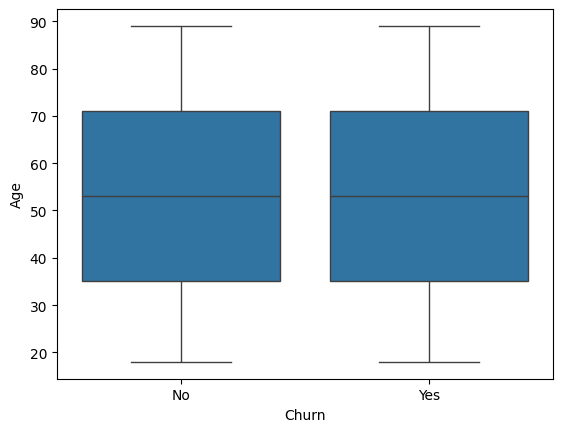

In [108]:
sns.boxplot(data = updated_data, x = "Churn", y = "Age")

<Axes: xlabel='Churn', ylabel='Income'>

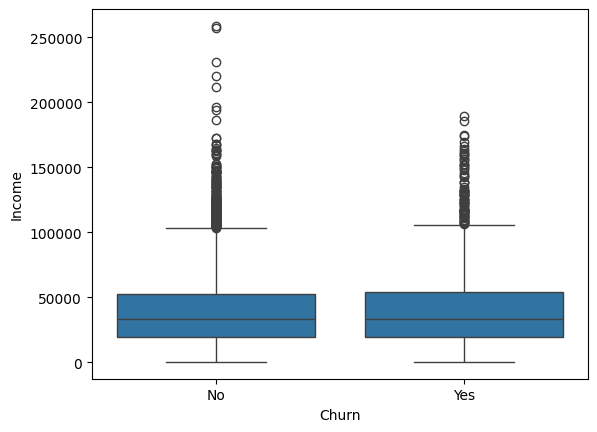

In [109]:
sns.boxplot(data = updated_data, x = "Churn", y = "Income")

<Axes: xlabel='Churn', ylabel='Tenure'>

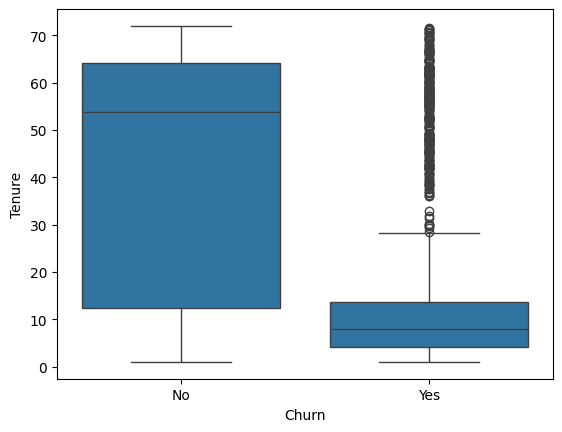

In [110]:
sns.boxplot(data = updated_data, x = "Churn", y = "Tenure")

<Axes: xlabel='Churn', ylabel='Outage_sec_perweek'>

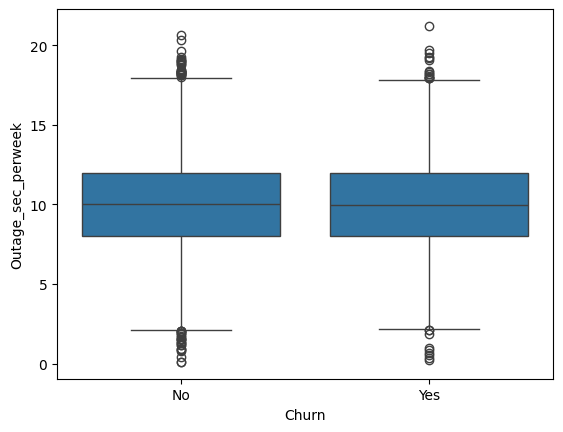

In [111]:
sns.boxplot(data = updated_data, x = "Churn", y = "Outage_sec_perweek")

<Axes: xlabel='Churn', ylabel='Email'>

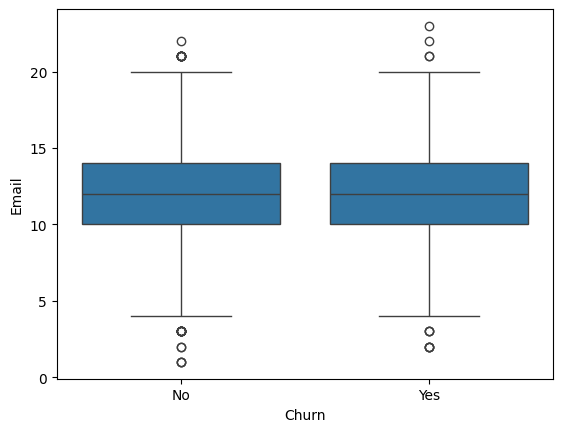

In [112]:
sns.boxplot(data = updated_data, x = "Churn", y = "Email")

<Axes: xlabel='Churn', ylabel='Bandwidth_GB_Year'>

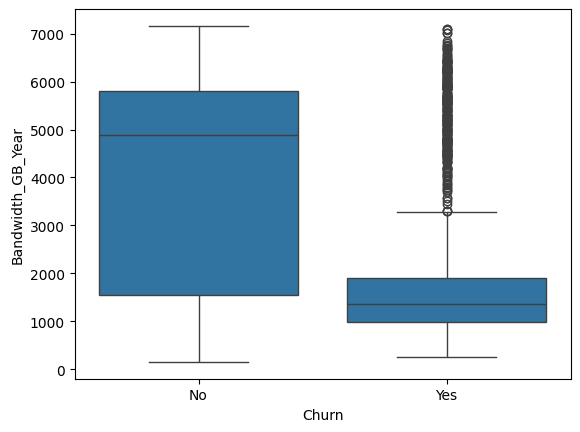

In [113]:
sns.boxplot(data = updated_data, x = "Churn", y = "Bandwidth_GB_Year")

<Axes: xlabel='Churn', ylabel='Yearly_equip_failure'>

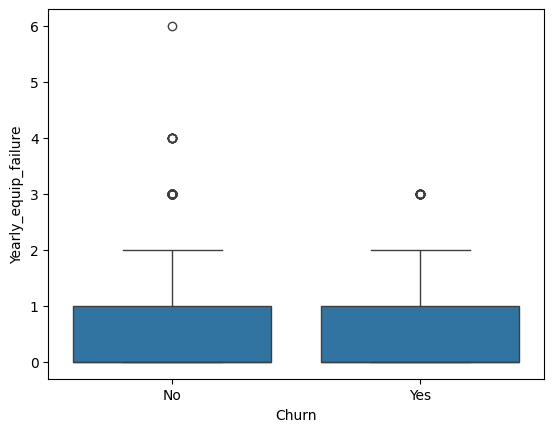

In [114]:
sns.boxplot(data = updated_data, x = "Churn", y = "Yearly_equip_failure")

<Axes: xlabel='Churn'>

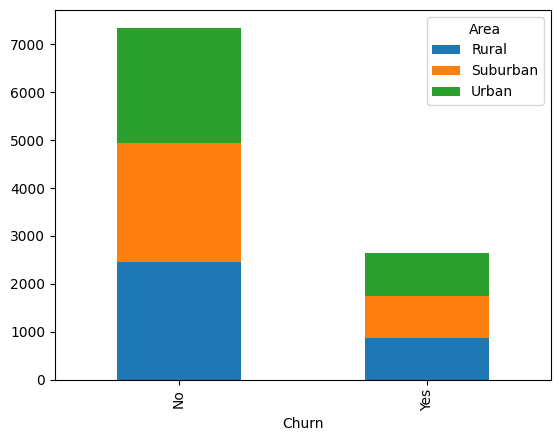

In [122]:
area_churn = pd.crosstab(updated_data.Churn, updated_data.Area)
area_churn.plot(kind='bar', stacked=True)

<Axes: xlabel='Churn'>

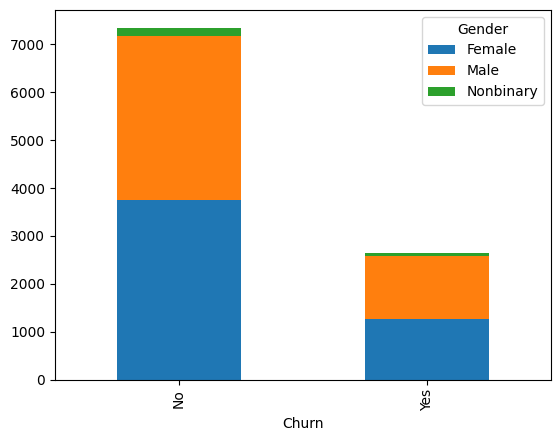

In [123]:
gender_churn = pd.crosstab(updated_data.Churn, updated_data.Gender)
gender_churn.plot(kind='bar', stacked=True)

<Axes: xlabel='Churn'>

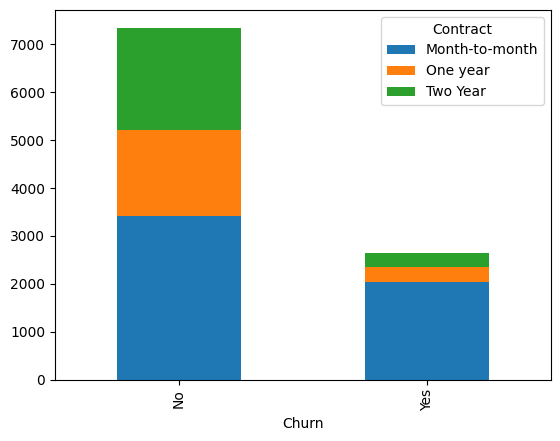

In [124]:
contract_churn = pd.crosstab(updated_data.Churn, updated_data.Contract)
contract_churn.plot(kind='bar', stacked=True)

<Axes: xlabel='Churn'>

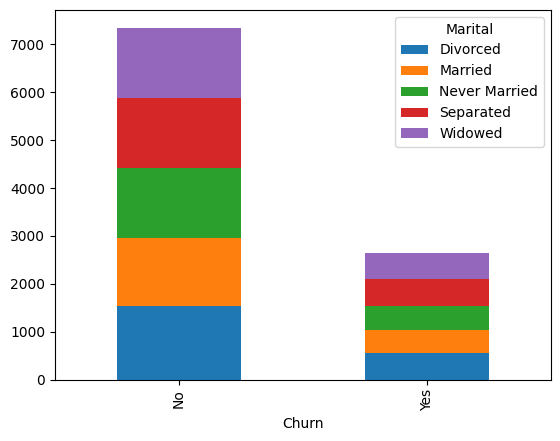

In [125]:
marital_churn = pd.crosstab(updated_data.Churn, updated_data.Marital)
marital_churn.plot(kind='bar', stacked=True)

<Axes: xlabel='Churn'>

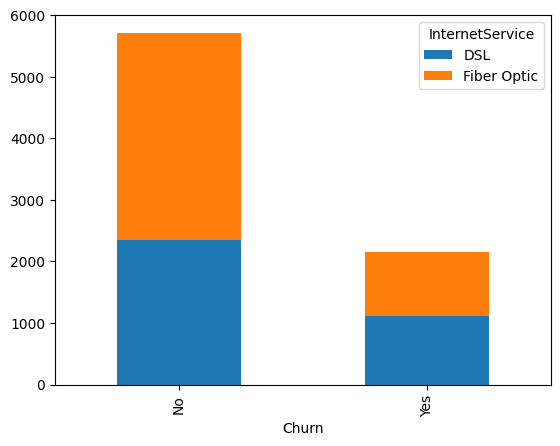

In [126]:
internet_churn = pd.crosstab(updated_data.Churn, updated_data.InternetService)
internet_churn.plot(kind='bar', stacked=True)

<Axes: xlabel='Churn'>

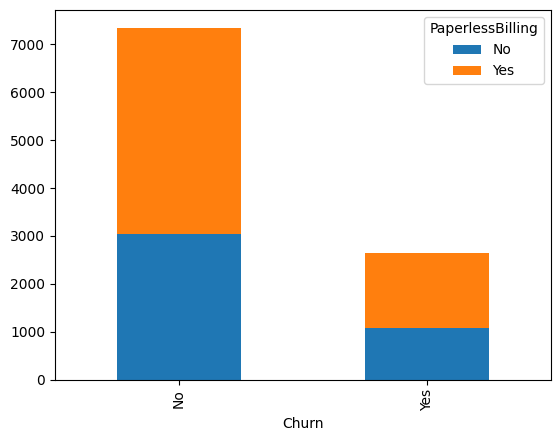

In [127]:
billing_churn = pd.crosstab(updated_data.Churn, updated_data.PaperlessBilling)
billing_churn.plot(kind='bar', stacked=True)